# Import essential modules

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

# Import data from Excel file

In [2]:
data_frame  = pd.read_csv('nutrients_csvfile.csv')
data_frame

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Cluster
0,Cows' milk,1 qt.,976,660.0,32,40,36.0,0.0,48.0,4
1,Milk skim,1 qt.,984,360.0,36,0,0.0,0.0,52.0,4
2,Buttermilk,1 cup,246,127.0,9,5,4.0,0.0,13.0,0
3,Evaporated undiluted,1 cup,252,345.0,16,20,18.0,0.0,24.0,3
4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,4
...,...,...,...,...,...,...,...,...,...,...
326,Fruit-flavored soda,12 oz.,346,161.0,0,0,0.0,0.0,42.0,0
327,Ginger ale,12 oz.,346,105.0,0,0,0.0,0.0,28.0,0
328,Root beer,12 oz.,346,140.0,0,0,0.0,0.0,35.0,0
329,Coffee,1 cup,230,3.0,0,0,0.0,0.0,1.0,0


# Replace empty values in the dataset

In [3]:
data_frame = data_frame.replace("t",0)
data_frame = data_frame.replace("t'",0)
data_frame.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Cluster
0,Cows' milk,1 qt.,976,660.0,32,40,36.0,0.0,48.0,4
1,Milk skim,1 qt.,984,360.0,36,0,0.0,0.0,52.0,4
2,Buttermilk,1 cup,246,127.0,9,5,4.0,0.0,13.0,0
3,Evaporated undiluted,1 cup,252,345.0,16,20,18.0,0.0,24.0,3
4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,4


# Perform transformation on data frame  

In [4]:
data_frame = data_frame.replace(",","", regex=True)
data_frame['Fiber']= data_frame['Fiber'].replace("a","", regex=True)
data_frame['Calories'][91]=(8+44)/2

C:\Users\Pansilu Wijesiri\AppData\Local\Temp\ipykernel_39556\670337975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Calories'][91]=(8+44)/2


In [5]:
data_frame['Grams']=pd.to_numeric(data_frame['Grams'])
data_frame['Calories']=pd.to_numeric(data_frame['Calories'])
data_frame['Protein']=pd.to_numeric(data_frame['Protein'])
data_frame['Fat']=pd.to_numeric(data_frame['Fat'])
data_frame['Sat.Fat']=pd.to_numeric(data_frame['Sat.Fat'])
data_frame['Fiber']=pd.to_numeric(data_frame['Fiber'])
data_frame['Carbs']=pd.to_numeric(data_frame['Carbs'])

In [6]:
data_frame.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Cluster       int64
dtype: object

# Remove missing values in the data set

In [7]:
data_frame.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Fat         0
Sat.Fat     0
Fiber       0
Carbs       0
Cluster     0
dtype: int64

In [8]:
data_frame.dropna(inplace = True)

In [9]:
data_frame

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Cluster
0,Cows' milk,1 qt.,976,660.0,32,40,36.0,0.0,48.0,4
1,Milk skim,1 qt.,984,360.0,36,0,0.0,0.0,52.0,4
2,Buttermilk,1 cup,246,127.0,9,5,4.0,0.0,13.0,0
3,Evaporated undiluted,1 cup,252,345.0,16,20,18.0,0.0,24.0,3
4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,4
...,...,...,...,...,...,...,...,...,...,...
326,Fruit-flavored soda,12 oz.,346,161.0,0,0,0.0,0.0,42.0,0
327,Ginger ale,12 oz.,346,105.0,0,0,0.0,0.0,28.0,0
328,Root beer,12 oz.,346,140.0,0,0,0.0,0.0,35.0,0
329,Coffee,1 cup,230,3.0,0,0,0.0,0.0,1.0,0


In [10]:
data_frame.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Fat         0
Sat.Fat     0
Fiber       0
Carbs       0
Cluster     0
dtype: int64

In [11]:
data_frame.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Cluster
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,143.703927,188.625378,8.561934,8.450151,6.477341,2.392175,25.245619,1.827795
std,139.368130,184.340015,17.828601,19.741199,18.566880,16.150091,35.964432,1.060566
min,11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.500000,2.000000
50%,108.000000,130.000000,3.000000,1.000000,0.000000,0.200000,14.000000,2.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000,3.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000,4.000000


<AxesSubplot:>

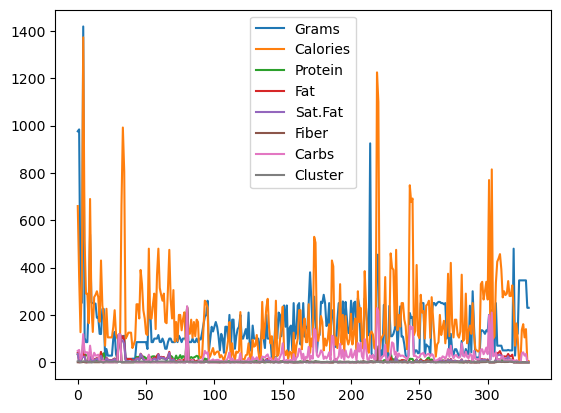

In [12]:
%matplotlib inline
data_frame.plot()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
calories_mm = MinMaxScaler().fit_transform(data_frame[['Calories']])
calories_mm

array([[0.4806992 ],
       [0.26219956],
       [0.09249818],
       [0.25127458],
       [1.        ],
       [0.37509104],
       [0.21121631],
       [0.21121631],
       [0.1201748 ],
       [0.50254916],
       [0.17115805],
       [0.09322651],
       [0.20029133],
       [0.20757465],
       [0.21849964],
       [0.20029133],
       [0.12381646],
       [0.31318281],
       [0.17479971],
       [0.14202476],
       [0.05098325],
       [0.16460306],
       [0.07647487],
       [0.07647487],
       [0.07647487],
       [0.07647487],
       [0.10924982],
       [0.16023307],
       [0.08739985],
       [0.07283321],
       [0.08230153],
       [0.08230153],
       [0.48434086],
       [0.72250546],
       [0.58703569],
       [0.07283321],
       [0.08011653],
       [0.09104151],
       [0.09104151],
       [0.09104151],
       [0.04369993],
       [0.05462491],
       [0.06919155],
       [0.17844137],
       [0.17844137],
       [0.13474144],
       [0.28404953],
       [0.240

In [15]:
calories_mm = pd.DataFrame(calories_mm, columns = ['Calories'])
calories_mm

,Calories
0,0.480699
1,0.262200
2,0.092498
3,0.251275
4,1.000000
...,...
326,0.117261
327,0.076475
328,0.101966
329,0.002185


In [16]:
calories_mm.describe()

,Calories
count,331.000000
mean,0.137382
std,0.134261
min,0.000000
25%,0.054625
50%,0.094683
75%,0.182083
max,1.000000


<AxesSubplot:ylabel='Frequency'>

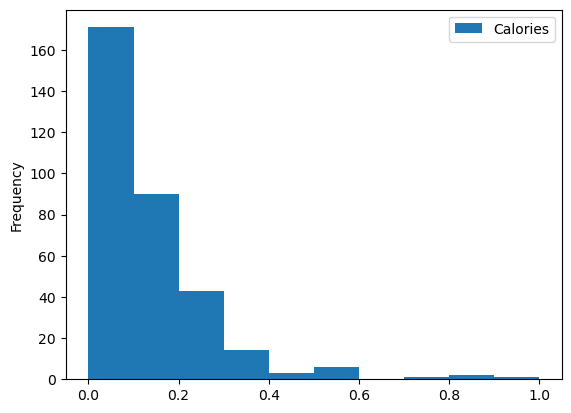

In [17]:
calories_mm.plot(kind = 'hist')

In [18]:
data_frame.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Cluster
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,143.703927,188.625378,8.561934,8.450151,6.477341,2.392175,25.245619,1.827795
std,139.368130,184.340015,17.828601,19.741199,18.566880,16.150091,35.964432,1.060566
min,11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.500000,2.000000
50%,108.000000,130.000000,3.000000,1.000000,0.000000,0.200000,14.000000,2.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000,3.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000,4.000000


# Normalize the data for better performance

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
features  = ['Grams','Calories','Protein','Fat','Sat.Fat','Fiber','Carbs']

In [21]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_frame[features])

# Apply data clustering

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(data_frame[features])
labels = kmeans.labels_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = features)

In [24]:
data_frame['Cluster'] = labels

# Visualize the results 

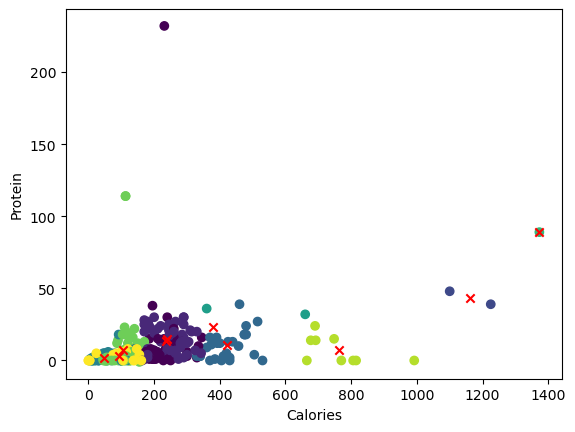

In [25]:
plt.scatter(data_frame['Calories'], data_frame['Protein'], c=labels)
plt.scatter(centroids['Calories'], centroids['Protein'], c = 'red', marker = 'x')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
inertia = kmeans.inertia_
silhouette = silhouette_score(normalized_data, labels)
print("Inertia: ", inertia)
print("Silhouette Score: ", silhouette)

Inertia:  2027392.5085441838
Silhouette Score:  0.13944690914545896


In [27]:
data_frame

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Cluster
0,Cows' milk,1 qt.,976,660.0,32,40,36.0,0.0,48.0,5
1,Milk skim,1 qt.,984,360.0,36,0,0.0,0.0,52.0,5
2,Buttermilk,1 cup,246,127.0,9,5,4.0,0.0,13.0,9
3,Evaporated undiluted,1 cup,252,345.0,16,20,18.0,0.0,24.0,0
4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,6
...,...,...,...,...,...,...,...,...,...,...
326,Fruit-flavored soda,12 oz.,346,161.0,0,0,0.0,0.0,42.0,9
327,Ginger ale,12 oz.,346,105.0,0,0,0.0,0.0,28.0,9
328,Root beer,12 oz.,346,140.0,0,0,0.0,0.0,35.0,9
329,Coffee,1 cup,230,3.0,0,0,0.0,0.0,1.0,9


# Display the number of instances in each cluster

In [28]:
counts =  pd.Series(labels).value_counts().sort_index()
counts

0    40
1    59
2     2
3    28
4    71
5     3
6     1
7    79
8     9
9    39
dtype: int64

# Save the data frame to a CSV file

In [29]:
data_frame.to_csv('nutrients_csvfile.csv', index = False)